# Final Project Milestone - Predicting March Madness Tournament Winner 

Names: Lauren Cutler, Sydney Smith, Hayden Kash

Date: April 3, 2024

## Data Description and Acquisition 

## Data Cleaning and Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Team Stats

#### Data Description and Acquisition

The team statistics data comes from the website https://barttorvik.com/teamstats.php?year=2024&sort=2, where all the data for each year is formatted in a data table with 362 men's basketball teams in the NCAA and each team having 19 variables. Therefore, the shape of our data is 362 rows and 19 columns. We copied the whole data table on the website and pasted it into an excel file and downloaded the excel file as a csv file, which allows us to read it by using pandas. We would also have to delete every other row, as the data table would have a ranking number below each statistic on every team. Luckily, excel would make another seperate row that would hold ranking numbers for each team, which we did not want as we only wanted to look at the statistics of each team. We repeated this process to read in other data tables from 3 previous basketball seasons that the website also has access to.

After we read in a data frame for each year we are analyzing, we went ahead and started exploring each data set by using the .head function to get a look at what each year's data frame looks like. We also used the .describe() function too look at a general summary of each year's data, and also made sure there were no duplicate or null values in each data frame.

In [5]:
team_stats24 = pd.read_csv('Team Stats 2024.csv')
dropodds = team_stats24.index % 2 != 0 
team_stats24 = team_stats24[~dropodds] # ~ create a boolean where True is the rows that we want to keep - dropping the odd numbered rows
team_stats24.head()

,RK,TEAM,CONF,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT% OFF.,FT% DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
0,1.0,Indiana St.,MVC,118.3,101.9,59.8,49.2,16.4,15.6,23.5,23.5,33.3,26.0,80.5,74.4,62.5,48.7,38.1,33.4
2,2.0,Wright St.,Horz,115.7,113.6,58.5,55.3,16.5,16.3,28.9,28.1,33.6,30.0,76.0,72.0,58.8,55.0,38.4,37.1
4,3.0,Creighton 3,BE,120.8,96.6,57.4,46.2,15.4,11.1,26.2,24.7,24.7,15.7,78.4,78.5,59.7,45.7,36.6,31.7
6,4.0,Eastern Washington,BSky,110.6,111.0,57.2,52.8,19.0,16.3,26.4,27.1,39.6,33.5,76.9,74.2,58.7,51.0,36.8,36.9
8,5.0,Kentucky 3,SEC,122.7,102.6,57.2,49.6,14.2,15.9,28.9,30.3,30.4,33.5,77.2,71.5,54.7,49.4,40.9,33.2


In [4]:
team_stats17 = pd.read_csv('team_2017.csv', encoding = 'unicode_escape')
dropodds = team_stats17.index % 2 != 0 
team_stats17 = team_stats17[~dropodds] # ~ create a boolean where True is the rows that we want to keep - dropping the odd numbered rows
team_stats17.head()

,RK,TEAM,CONF,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT%OFF.,FT%DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
0,1.0,UCLA 3,P12,123.5,100.5,59.8,48.7,15.1,15.8,29.1,28.6,26.8,25.4,73.8,67.9,59.1,45.3,40.6,36.5
2,2.0,Saint Mary's 7,WCC,118.9,94.7,57.8,45.3,17.5,15.3,33.1,21.9,27.8,26.6,74.5,69.1,56.9,45.4,39.4,30.0
4,3.0,Creighton 6,BE,115.2,96.2,57.6,49.9,17.1,19.3,24.2,29.6,27.9,29.3,68.3,68.9,56.4,50.2,39.8,33.0
6,4.0,Villanova 1,BE,122.9,93.5,57.5,48.1,17.1,20.1,30.2,27.8,35.0,22.1,79.0,70.3,59.2,49.1,36.9,31.1
8,5.0,Marquette 10,BE,122.5,102.9,57.5,52.2,17.3,18.3,27.1,29.2,31.0,35.7,78.1,69.7,52.7,50.6,42.9,36.8


In [5]:
team_stats16 = pd.read_csv('team_2016.csv', encoding = 'unicode_escape')
dropodds = team_stats16.index % 2 != 0 
team_stats16 = team_stats16[~dropodds] # ~ create a boolean where True is the rows that we want to keep - dropping the odd numbered rows
team_stats16.head()

,RK,TEAM,CONF,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT% OFF.,FT% DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
0,1.0,Indiana 5,B10,122.1,99.5,58.7,49.8,19.6,18.9,37.2,29.2,33.9,30.2,73.1,68.1,56.1,49.0,41.6,34.3
2,2.0,Belmont,OVC,114.5,110.3,58.6,50.8,19.3,16.5,26.4,30.9,34.5,37.1,72.8,72.1,62.6,49.5,36.4,35.4
4,3.0,Saint Mary's,WCC,118.6,99.6,58.4,46.2,15.4,15.5,29.8,26.7,29.0,24.1,68.8,68.0,56.4,44.8,41.0,32.7
6,4.0,North Florida,ASun,114.4,113.9,57.9,51.8,15.3,14.4,24.1,33.4,28.7,27.1,72.6,66.8,54.7,51.8,40.9,34.6
8,5.0,Iowa St. 4,B12,122.1,100.2,57.1,49.8,15.7,16.8,26.2,30.1,26.1,24.9,70.2,68.8,56.7,49.5,38.7,33.5


In [6]:
team_stats09 = pd.read_csv('team_2009.csv', encoding = 'unicode_escape')
dropodds = team_stats09.index % 2 != 0 
team_stats09 = team_stats09[~dropodds] # ~ create a boolean where True is the rows that we want to keep - dropping the odd numbered rows
team_stats09.head()

,RK,TEAM,CONF,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT% OFF.,FT% DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
0,1.0,Denver,SB,101.0,104.2,57.0,49.4,22.1,22.2,18.8,33.0,36.1,49.3,73.8,71.4,57.5,50.0,37.7,31.9
2,2.0,Arizona St. 6,P10,118.0,94.6,56.4,47.0,18.6,19.5,29.1,30.0,38.7,30.9,73.7,73.8,57.1,46.5,37.0,31.9
4,3.0,Eastern Kentucky,OVC,111.5,111.7,56.2,53.0,18.2,22.8,31.5,40.6,28.4,31.4,70.0,68.7,52.1,52.5,40.6,35.8
6,4.0,Utah St. 11,WAC,116.1,102.0,55.7,47.3,18.2,17.0,36.0,27.9,37.6,30.4,74.5,74.5,54.0,44.3,39.5,36.3
8,5.0,UCLA 6,P10,120.0,95.0,55.7,49.8,19.0,23.9,36.3,31.3,31.2,35.6,72.4,69.6,53.5,48.0,39.9,36.1


In [7]:
team_stats24.describe()

,RK,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT% OFF.,FT% DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,181.500000,105.379006,105.379558,50.381768,50.536464,17.133425,17.079006,28.829834,29.038122,32.904144,33.070442,71.855801,71.943094,50.293370,50.390608,33.692541,33.852762
std,104.644637,7.539264,5.979181,3.028717,2.373643,2.010131,2.279002,4.043509,2.880046,4.722934,5.490549,3.565001,2.211120,3.359859,2.834975,2.501828,1.998048
min,1.000000,85.200000,86.500000,41.000000,43.700000,12.000000,11.100000,17.300000,22.300000,21.400000,15.700000,59.800000,64.400000,40.400000,42.900000,24.700000,27.900000
25%,91.250000,100.000000,101.025000,48.300000,49.000000,15.700000,15.725000,26.225000,26.900000,29.325000,29.300000,69.900000,70.500000,48.100000,48.525000,32.100000,32.500000
50%,181.500000,105.000000,105.600000,50.600000,50.500000,17.000000,16.900000,28.600000,29.000000,32.700000,32.600000,72.100000,72.000000,50.200000,50.600000,33.850000,33.900000
75%,271.750000,110.275000,110.000000,52.200000,52.200000,18.300000,18.375000,31.700000,30.900000,36.175000,36.150000,74.175000,73.400000,52.275000,52.300000,35.500000,35.200000
max,362.000000,127.100000,121.000000,59.800000,58.200000,24.000000,25.900000,42.200000,38.600000,50.000000,49.200000,80.800000,78.500000,62.500000,59.000000,40.900000,40.300000


In [8]:
team_stats17.describe()

,RK,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT%OFF.,FT%DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,176.000000,104.694302,104.691453,50.382906,50.574644,18.591738,18.541026,29.118803,29.297151,35.326781,35.640456,70.353561,70.437037,49.284900,49.437892,34.862963,35.055271
std,101.469207,7.275043,6.528818,3.052586,2.815591,1.891882,2.101026,4.092940,2.867043,4.486433,5.796187,3.757976,2.244217,3.257997,3.251165,2.711340,2.383639
min,1.000000,84.900000,87.200000,41.000000,41.100000,13.900000,13.800000,15.000000,21.700000,24.000000,22.100000,59.400000,63.700000,40.100000,39.900000,26.700000,28.900000
25%,88.500000,99.750000,100.350000,48.300000,48.700000,17.400000,17.150000,26.750000,27.300000,32.450000,31.900000,67.900000,68.900000,47.150000,47.300000,33.000000,33.450000
50%,176.000000,103.900000,104.400000,50.500000,50.600000,18.500000,18.500000,29.300000,29.300000,35.100000,35.100000,70.100000,70.500000,49.200000,49.500000,34.800000,35.100000
75%,263.500000,109.000000,109.000000,52.350000,52.600000,19.800000,19.800000,31.600000,31.250000,38.250000,39.550000,73.050000,72.050000,51.400000,51.850000,36.800000,36.500000
max,351.000000,127.400000,124.500000,59.800000,57.900000,25.900000,27.600000,41.300000,37.600000,46.000000,58.500000,80.000000,76.600000,60.900000,58.600000,42.900000,42.000000


In [9]:
team_stats16.describe()

,RK,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT% OFF.,FT% DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.00000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,176.000000,104.818519,104.820798,49.777493,49.969801,18.183761,18.119943,29.618803,29.821083,36.637892,36.936467,69.88604,69.965812,48.662963,48.822792,34.537892,34.729630
std,101.469207,7.397515,6.254036,3.029056,2.687059,1.898087,2.084939,4.111467,2.874868,4.607071,5.884574,3.44323,2.283925,3.255298,3.121857,2.804051,2.324977
min,1.000000,83.800000,89.000000,41.500000,42.500000,13.600000,10.200000,17.700000,21.700000,25.500000,23.000000,58.90000,62.700000,38.300000,41.300000,27.300000,28.700000
25%,88.500000,100.050000,100.200000,47.700000,48.150000,16.800000,16.700000,26.950000,27.900000,33.300000,32.950000,67.60000,68.300000,46.300000,46.650000,32.600000,33.100000
50%,176.000000,104.200000,104.900000,49.800000,49.900000,18.100000,18.100000,29.600000,29.800000,36.800000,37.100000,69.70000,70.100000,48.700000,48.900000,34.500000,34.800000
75%,263.500000,109.900000,109.350000,51.700000,51.700000,19.400000,19.400000,32.200000,31.550000,40.200000,40.600000,72.35000,71.600000,50.700000,51.050000,36.400000,36.350000
max,351.000000,124.300000,119.200000,58.700000,59.000000,25.400000,25.900000,42.000000,38.800000,49.400000,55.300000,79.30000,75.900000,62.600000,59.800000,43.400000,42.200000


In [10]:
team_stats09.describe()

,RK,ADJ. EFF. OFF.,ADJ. EFF. DEF.,EFF. FG% OFF.,EFF. FG% DEF.,TURNOVER% OFF.,TURNOVER% DEF.,OFF. REB% OFF.,OFF. REB% DEF.,FT RATE OFF.,FT RATE DEF.,FT% OFF.,FT% DEF.,2P% OFF.,2P% DEF.,3P% OFF.,3P% DEF.
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,172.500000,102.107849,102.103779,48.973837,49.195349,20.767733,20.652035,32.570930,32.805233,36.378488,36.743314,68.800581,68.935465,47.893023,48.098547,34.047093,34.273256
std,99.448479,7.848624,6.135716,3.173728,2.750443,2.293896,2.200582,3.936333,3.067791,4.711088,5.876584,3.947587,2.282400,3.373289,3.171488,2.935923,2.264979
min,1.000000,73.200000,84.200000,38.500000,41.400000,13.900000,14.500000,18.800000,25.000000,22.500000,19.500000,56.400000,62.500000,38.600000,39.400000,24.800000,27.800000
25%,86.750000,96.600000,98.200000,46.875000,47.300000,19.200000,19.100000,30.100000,30.800000,33.100000,32.800000,66.000000,67.400000,45.900000,46.175000,32.100000,32.800000
50%,172.500000,102.000000,102.100000,48.900000,49.300000,20.500000,20.500000,32.600000,32.750000,36.550000,36.300000,69.000000,68.950000,47.900000,48.200000,33.850000,34.300000
75%,258.250000,107.500000,106.325000,51.100000,51.100000,22.300000,22.200000,35.200000,34.900000,39.500000,40.000000,71.500000,70.525000,50.200000,50.200000,36.000000,35.700000
max,344.000000,123.800000,117.900000,57.000000,57.300000,27.400000,27.200000,42.500000,42.100000,54.400000,57.600000,79.900000,74.800000,57.500000,58.700000,42.700000,42.200000


In [11]:
print(team_stats24.isnull().values.any())
print(team_stats17.isnull().values.any())
print(team_stats16.isnull().values.any())
print(team_stats09.isnull().values.any())

False
False
False
False


In [12]:
print(team_stats24.duplicated().values.any())
print(team_stats17.duplicated().values.any())
print(team_stats16.duplicated().values.any())
print(team_stats09.duplicated().values.any())

False
False
False
False


#### Summary Statistics

**Breakdown of what each metric means:** 

- **RK** : Team Rank 
- **CONF** : Conference
- **ADJ. EFF. OFF.** : Adjusted Offensive Efficiency 
- **ADJ. EFF. DEF.** : Adjusted Defensive Efficiency
- **EFF. FG% OFF.** :  Effective Field Goal Percentage Offense 
- **EFF. FG% DEF.** : Effective Field Goal Percentange Deffense
- **TURNOVER% OFF.** : Turnover Percentage Offense
- **TURNOVER% DEF.** : Turnover Percentage Defense 
- **REB% OFF.** : Rebound Percentage Offense 
- **REB% DEF.** : Rebound Percentange Defense 
- **FT RATE OFF.** : Free Throw Rate Offense 
- **FT RATE DEF.** : Free Throw Rate Defense 
- **FT% OFF.** : Free Throw Percentage Offense 
- **FT% DEF.** : Free Throw Percentage Defense 
- **2P% OFF.** : 2 Pointer Percentage Offense
- **2P% DEF.** : 2 Pointer Percentage Defense 
- **3P% OFF.** : 3 Pointer Percentage Offense
- **3P% DEF.** : 3 Pointer Percentage Defense

#### Data Cleaning and Processing

Most of the cleaning was conducted through excel and deleting every other row, which was pretty straightforward as mentioned above. How we decided to process the data of the team statistics is comparing some of the variables of the basketball teams to the team's rank. We decided to look at the relationship of a team's rank compared to their percentage of 3-pointers they make, a team's offensive efficiency score, and the percentage of points they block from their opponent. The reason we decided to choose these three variables is because we felt that offense, defense, the amount of points scored are the top factors of determining the rank of a team. We also looked at different years for each comparison.

After looking at the graphs, we discover that a team's rank has a fairly strong relationship to their offense efficiency and the percentage of 3-pointers they make. However, it seems that a team's defense score isn't as strongly correlated to the team's rank, which is quite fascinating and something we might need to explore further.

Text(0.5, 1.0, "Summary of Offensive 3-Pointer's Made")

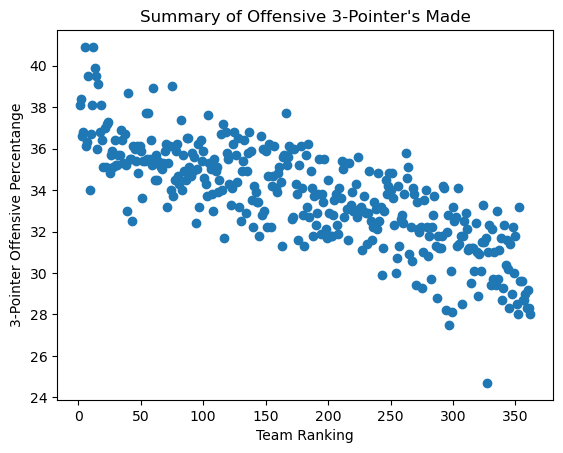

In [13]:
plt.scatter(team_stats24["RK"], team_stats24["3P% OFF."])
plt.xlabel("Team Ranking")
plt.ylabel("3-Pointer Offensive Percentange")
plt.title("Summary of Offensive 3-Pointer's Made")

Text(0.5, 1.0, 'Summary of Team Offensive Eficiency')

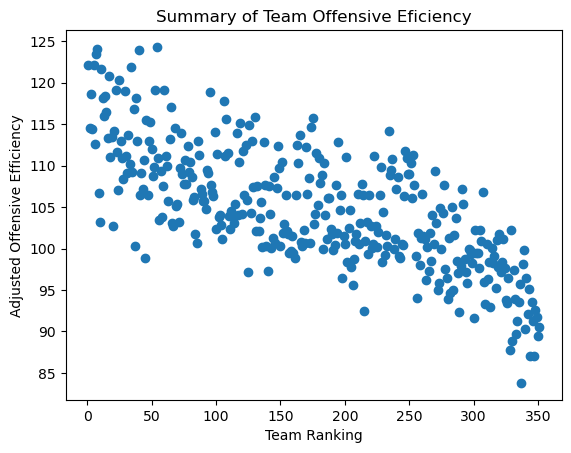

In [14]:
plt.scatter(team_stats16["RK"], team_stats16["ADJ. EFF. OFF."])
plt.xlabel("Team Ranking")
plt.ylabel("Adjusted Offensive Efficiency")
plt.title("Summary of Team Offensive Eficiency")

Text(0.5, 1.0, 'Percentage of Points Blocked')

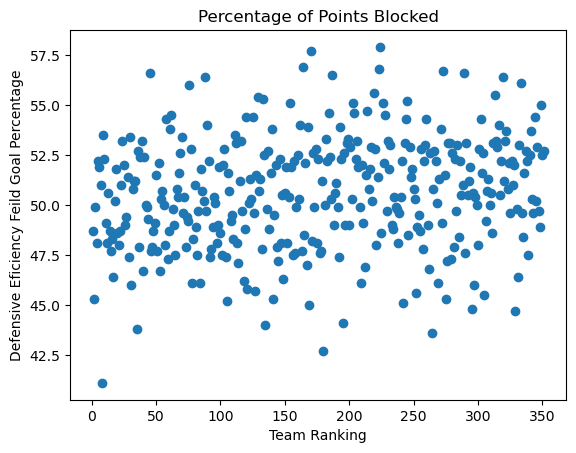

In [15]:
plt.scatter(team_stats17["RK"], team_stats17["EFF. FG% DEF."])
plt.xlabel("Team Ranking")
plt.ylabel("Defensive Eficiency Feild Goal Percentage")
plt.title("Percentage of Points Blocked")

### Player Stats

#### Data Description and Acquisition

This data was obtained from https://barttorvik.com/playerstat.php?year=2024 . The data was copied and pasted into an excel file where unnecessary columns (like 3P/100) were removed and column names were edited to ensure consistency throughout each dataset. Once the data was cleaned within excel, the file was converted to a csv file where it was then uploaded to this Jupyter notebook. Each year's data is described below, using the data.describe() function for a pandas dataframe after double checking that there are not any duplicate values or columns/rows that do not contain any information.

The data imported to this Jupyter notebook describes the statistics collected on the top 1050 players for each year chosen (at random). 1050 was chosen as the number of players because if there are 64 teams in the bracket, that allows for each team to have at least 15 players within the top 1050, which is highly unlikely, therefore it encapsulated a good amount of players and there was high probability that the highest ranked players were in the March Madness tournament that year.

In [ ]:
check1 = player_stats09.duplicated().values.any()
check2 = player_stats09.isnull().values.any() 

check3 = player_stats16.duplicated().values.any()
check4 = player_stats16.isnull().values.any() 

check5 = player_stats17.duplicated().values.any()
check6 = player_stats17.isnull().values.any() 

check7 = player_stats24.duplicated().values.any()
check8 = player_stats24.isnull().values.any() 

print('check to see if data has issues that need to be addressed: ', check1, check2, check3, check4, check5, check6, check7, check8)
print('none of the data sets have duplicate items or NAN values! yay! ')

In [ ]:
winner09 = player_stats09[player_stats09['TEAM'] == 'North Carolina']
winner16 = player_stats16[player_stats16['TEAM'] == 'Villanova']
winner17 = player_stats17[player_stats17['TEAM'] == 'North Carolina']

In [ ]:
player_stats09.head()

In [ ]:
player_stats16.head() 

In [ ]:
player_stats17.head()

In [ ]:
player_stats24.head()

#### Summary Statistics

**Breakdown of what each metric means:** 

- **RK** : Player Rank 
- **MIN%** : Total minutes played by a player throughout the season 
- **PRPG** : Points per game 
- **BPM** : Box plus minus - estimation of the players overall impact on the game per 100 posessions, relative to league average - this metric already takes into account various statistical categories. 
- **ORTG** : offensive rating - reflects a players offensive efficiency 
- **USG** : Usage rate - percentage of team plays used by a player while they're on the court. Essentially measures how involved a player is in the team's offensive posessions 
- **EFG** : Effective Field Goal Percentage - this metric adjusts traditional field goal percentage to account for the fact that three pointers are worth more than two pointers 
- **TS** : True shooting percentage (shooting efficiency) 
- **OR** : offensive rebounds 
- **DR** : defensive rebounds 
- **AST** : Assists 
- **TO** : Turnovers 
- **BLK** : Blocks 
- **STL** : Steals 
- **FTR** : Free throw rate 
- **2P** : two point percentage 
- **3P** : three point percentage

In [ ]:
player_stats09.describe()

In [ ]:
player_stats16.describe()

In [ ]:
player_stats17.describe()

In [ ]:
player_stats24.describe()

#### Data Cleaning and Processing

### Tournament Stats

#### Data Description and Acquisition

The tournament statistics include data about past March Madness tournaments. This includes the team name, number of tournament wins and losses, how many games played in each round, how many times a team has been the champion and how the team performed based on komputer and seeding expectations. PAKE stands for performance against Komputer expectations and PASE stands for performance against seed expectations. All of this data was obtained from https://barttorvik.com/cgi-bin/ncaat.cgi and copied into excel, saved as a csv, and read into a jupyter notebook. We are looking at the year 2000 through the prior year for tournament stats.

In [4]:
#Reading in 2023 tournament stats
tourney_stats_2023 = pd.read_csv("tourney_stats_2023.csv")
tourney_stats_2023.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,North Carolina,15.0,13.3,55,16,0.775,19,18,12,10,7,5,3,11,99.10%,70.00%
1,2,Connecticut,12.7,14.0,39,11,0.780,15,11,8,7,5,4,4,5,91.50%,47.70%
2,3,Michigan St.,12.4,15.4,49,21,0.700,22,17,13,9,7,2,1,6,97.90%,60.10%
3,4,UCLA,10.5,11.5,35,16,0.686,16,14,12,4,4,1,0,4,88.20%,38.40%
4,5,Butler,9.2,10.9,22,13,0.629,13,11,5,2,2,2,0,0,43.70%,6.70%


In [5]:
#Reading in 2016 tournament stats
tourney_stats_2016 = pd.read_csv("tourney_stats_2016.csv")
tourney_stats_2016.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Connecticut,11.7,11.6,33,9,0.786,12,10,7,6,4,3,3,5,86.20%,38.20%
1,2,North Carolina,10.8,9.6,41,12,0.774,14,14,9,8,5,3,2,8,97.40%,62.40%
2,3,Michigan St.,10.7,13.0,40,16,0.714,17,12,11,8,6,2,1,5,96.00%,54.90%
3,4,Butler,9.0,10.1,19,11,0.633,11,9,4,2,2,2,0,0,36.20%,5.00%
4,5,UCLA,8.2,7.9,25,12,0.676,12,10,8,3,3,1,0,3,76.80%,27.10%


In [6]:
#Reading in 2015 tournament stats
tourney_stats_2015 = pd.read_csv("tourney_stats_2015.csv")
tourney_stats_2015.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Duke,-1.3,-3.7,40,13,0.755,16,13,12,5,4,3,3,13,99.80%,84.60%
1,2,Kansas,3.1,0.9,39,15,0.722,16,14,10,7,4,3,1,10,98.70%,71.80%
2,3,Kentucky,7.8,7.8,36,13,0.735,14,13,9,7,4,2,1,7,97.50%,66.30%
3,4,North Carolina,8.9,7.9,36,11,0.766,13,13,8,7,4,2,2,7,95.60%,56.00%
4,5,Florida,7.6,9.7,33,11,0.750,13,10,7,7,4,3,2,4,94.30%,55.90%


In [7]:
#Reading in 2008 tournament stats
tourney_stats_2008 = pd.read_csv("tourney_stats_2008.csv")
tourney_stats_2008.head()

,RK,TEAM,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2,F4%,CHAMP%
0,1,Duke,-3.8,-4.0,21,8,0.724,9,8,7,2,2,1,1,7,98.20%,72.80%
1,2,Kansas,4.4,4.6,24,8,0.750,9,7,6,5,3,2,1,4,91.40%,52.50%
2,3,Illinois,-0.9,0.6,15,8,0.652,8,7,4,2,1,1,0,2,84.00%,42.80%
3,4,North Carolina,4.1,4.2,20,6,0.769,7,7,4,4,3,1,1,4,86.60%,40.80%
4,5,Michigan St.,5.1,7.0,20,8,0.714,9,6,5,4,3,1,1,2,85.90%,40.00%


#### Data Cleaning and Processing

#### Summary statistics


**Breakdown of what each metric means:** 

- **PAKE** : Performance against Komputer expectations 
- **PASE** : Performance against seed expectations 
- **WINS** : Wins excluding play in games 
- **LOSS** : Losses excluding play in games
- **W%** : Win percentage excluding play in games 
- **R64** : Appearances in the round of 64
- **R32** : Appearances in the round of 32
- **S16** : Appearances in the sweet 16
- **E8** : Appearances in the elite eight
- **F4** : Appearances in the final four
- **F2** : Championship game appearances
- **CHAMP** : National titles
- **TOP2** : Years awarded a 1 or 2 seed
- **F4%** : Likelihood of getting to at least the final 4
- **CHAMP%** : Likelihood of winning at least 1 title per efficiency rating


The descriptive statistics seem reasonable for all the data points and timepoints. For example, the mean decreases for each field between the round of 64 to champion which makes sense because there are fewer games played in each round. There are zeros for most of the minimum values because many teams have never won a game in the tournament. The loss column minimum is 1 for all the timepoints because no team has won every tournament since 2000. The count, which represent the games played, goes down for each dataset. This is expected because there shouldn't be more games played in 2016 than 2023. 

In [8]:
tourney_stats_2023.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,133.500000,-0.011654,-0.003759,5.447368,5.447368,0.261714,5.533835,2.766917,1.383459,0.691729,0.345865,0.172932,0.086466,0.691729
std,76.931788,2.656025,2.841416,10.306210,4.858668,0.249483,5.050012,4.265504,2.812967,1.736100,1.050032,0.632590,0.438743,2.076574
min,1.000000,-8.300000,-9.100000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.250000,-0.900000,-1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,133.500000,-0.200000,-0.200000,1.000000,4.000000,0.250000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,199.750000,0.475000,0.500000,5.000000,8.000000,0.500000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.000000,15.000000,15.400000,58.000000,23.000000,0.780000,23.000000,21.000000,16.000000,11.000000,7.000000,5.000000,4.000000,17.000000


In [9]:
tourney_stats_2016.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,121.000000,-0.014108,-0.002905,4.443983,4.443983,0.253581,4.514523,2.257261,1.128631,0.564315,0.282158,0.141079,0.070539,0.564315
std,69.714896,2.215638,2.394689,8.332540,3.781255,0.255457,3.937109,3.382584,2.272125,1.465226,0.896320,0.521230,0.364010,1.626926
min,1.000000,-6.700000,-5.600000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,-0.800000,-0.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121.000000,-0.200000,-0.200000,1.000000,3.000000,0.231000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,181.000000,0.300000,0.400000,5.000000,6.000000,0.500000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,241.000000,11.700000,13.000000,42.000000,17.000000,0.786000,17.000000,15.000000,13.000000,8.000000,6.000000,3.000000,3.000000,13.000000


In [10]:
tourney_stats_2015.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,-0.014103,-0.001282,4.307692,4.307692,0.254239,4.376068,2.188034,1.094017,0.547009,0.273504,0.136752,0.068376,0.547009
std,67.694165,2.239907,2.448289,7.988685,3.578576,0.257610,3.728389,3.237208,2.172726,1.411150,0.865395,0.505862,0.364203,1.566800
min,1.000000,-6.000000,-5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.250000,-0.800000,-0.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.500000,-0.200000,-0.200000,1.000000,3.000000,0.215500,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.750000,0.275000,0.400000,4.750000,6.000000,0.500000,6.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,234.000000,13.000000,15.300000,40.000000,16.000000,0.800000,16.000000,14.000000,12.000000,8.000000,6.000000,3.000000,3.000000,13.000000


In [11]:
tourney_stats_2008.describe()

,RK,PAKE,PASE,WINS,LOSS,W%,R64,R32,S16,E8,F4,F2,CHAMP,TOP2
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,-0.007254,-0.002073,2.937824,2.937824,0.261503,2.984456,1.492228,0.746114,0.373057,0.186528,0.093264,0.046632,0.373057
std,55.858452,1.456254,1.632737,4.861227,2.132650,0.273956,2.220822,2.036437,1.339620,0.869446,0.574116,0.355912,0.234746,0.987262
min,1.000000,-4.700000,-6.300000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,-0.600000,-0.600000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,-0.200000,-0.200000,1.000000,2.000000,0.200000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,145.000000,0.400000,0.400000,4.000000,4.000000,0.500000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,193.000000,7.000000,7.100000,24.000000,9.000000,0.769000,9.000000,8.000000,7.000000,5.000000,3.000000,3.000000,2.000000,7.000000


####  Checking for missing data


There are no missing values in all 4 datasets.

In [12]:
print(tourney_stats_2023.isnull().values.any())
print(tourney_stats_2016.isnull().values.any())
print(tourney_stats_2015.isnull().values.any())
print(tourney_stats_2008.isnull().values.any())

False
False
False
False


####  Checking for duplicate data

There are no duplicates in all 4 datasets.

In [13]:
print(tourney_stats_2023.duplicated().values.any())
print(tourney_stats_2016.duplicated().values.any())
print(tourney_stats_2015.duplicated().values.any())
print(tourney_stats_2008.duplicated().values.any())

False
False
False
False


####  Checking for Outliers

There are outliers in the PAKE and PASE columns. We will need to decide how to handle these outliers. 

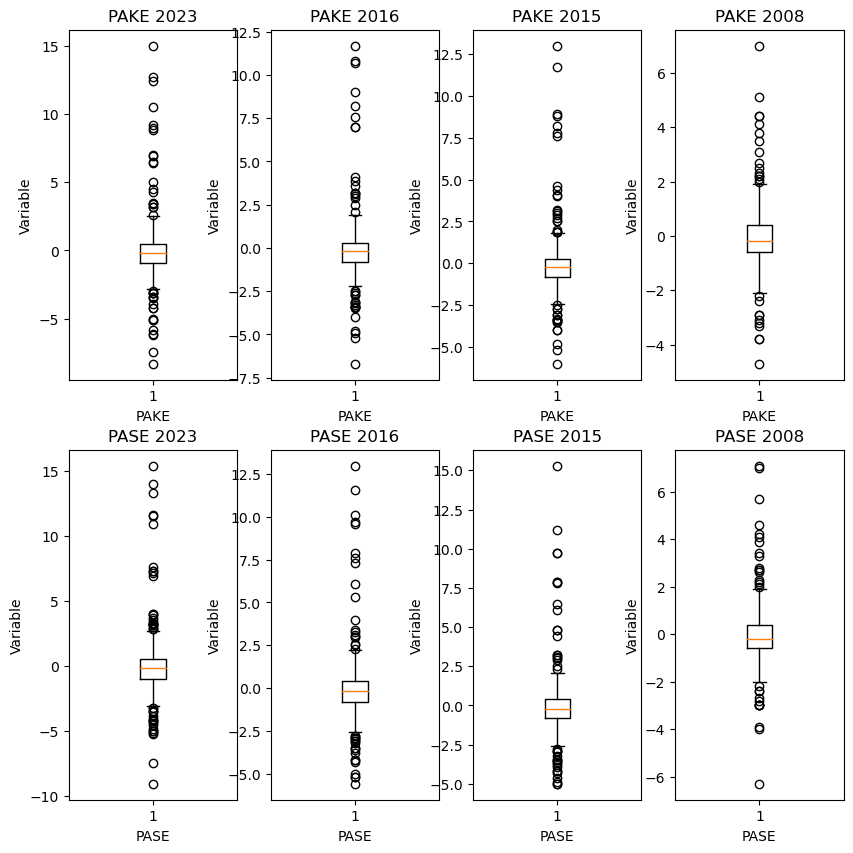

In [15]:
plt.figure(figsize= (10, 10)) 
plt.subplot(2, 4, 1)
plt.boxplot(tourney_stats_2023['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2023')

plt.subplot(2, 4, 5)
plt.boxplot(tourney_stats_2023['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2023')

plt.subplot(2, 4, 2)
plt.boxplot(tourney_stats_2016['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2016')

plt.subplot(2, 4, 6)
plt.boxplot(tourney_stats_2016['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2016')

plt.subplot(2, 4, 3)
plt.boxplot(tourney_stats_2015['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2015')

plt.subplot(2, 4, 7)
plt.boxplot(tourney_stats_2015['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2015')

plt.subplot(2, 4, 4)
plt.boxplot(tourney_stats_2008['PAKE'])
plt.ylabel('Variable')
plt.xlabel('PAKE')
plt.title('PAKE 2008')

plt.subplot(2, 4, 8)
plt.boxplot(tourney_stats_2008['PASE'])
plt.ylabel('Variable')
plt.xlabel('PASE')
plt.title('PASE 2008')

plt.show()

The next set of plots looks at how PIKE and PACE change with rank. PAKE and PASE for 2023 and 2016 follow a similar pattern of higher ranked teams having higher numbers, middle rankings flattening the curve and then taking a dip for lowest ranked teams. 2015 and 2008 data are a little more variable. 

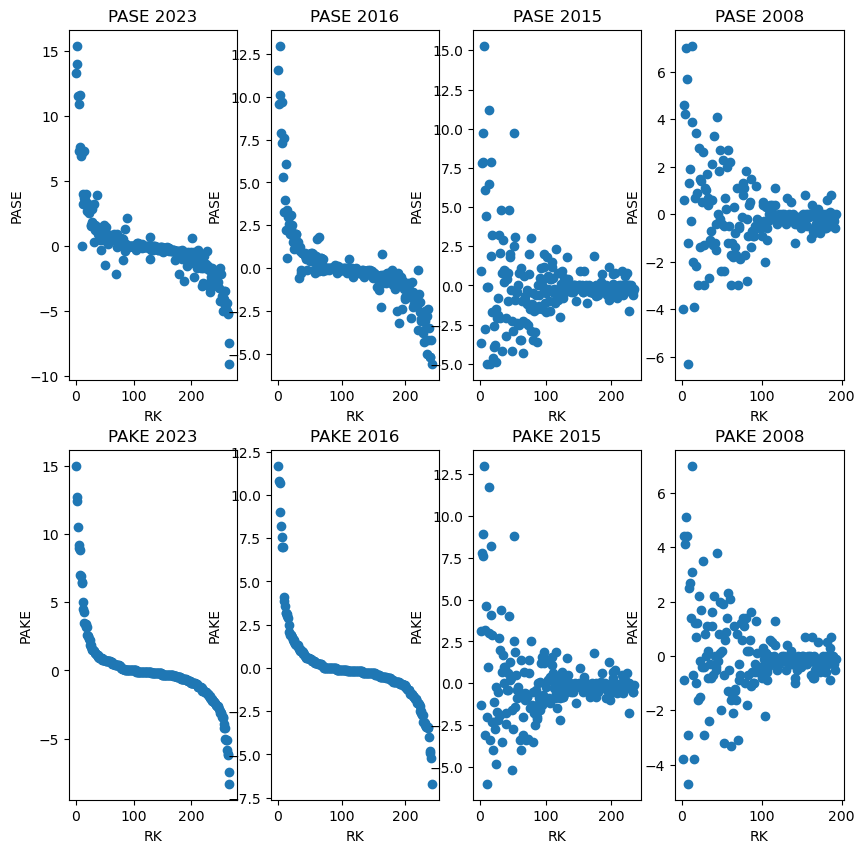

In [16]:
plt.figure(figsize= (10, 10)) 
plt.subplot(2, 4, 1)
plt.scatter(tourney_stats_2023['RK'], tourney_stats_2023['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2023')


plt.subplot(2, 4, 2)
plt.scatter(tourney_stats_2016['RK'], tourney_stats_2016['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2016')


plt.subplot(2, 4, 3)
plt.scatter(tourney_stats_2015['RK'], tourney_stats_2015['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2015')


plt.subplot(2, 4, 4)
plt.scatter(tourney_stats_2008['RK'], tourney_stats_2008['PASE'])
plt.ylabel('PASE')
plt.xlabel('RK')
plt.title('PASE 2008')


plt.subplot(2, 4, 5)
plt.scatter(tourney_stats_2023['RK'], tourney_stats_2023['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2023')


plt.subplot(2, 4, 6)
plt.scatter(tourney_stats_2016['RK'], tourney_stats_2016['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2016')


plt.subplot(2, 4, 7)
plt.scatter(tourney_stats_2015['RK'], tourney_stats_2015['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2015')


plt.subplot(2, 4, 8)
plt.scatter(tourney_stats_2008['RK'], tourney_stats_2008['PAKE'])
plt.ylabel('PAKE')
plt.xlabel('RK')
plt.title('PAKE 2008')
plt.show()

## Exploratory Analysis

## Project Schedule